In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision.datasets import ImageFolder

from utils import DataAugmentationDINO

In [2]:
def to_numpy(t):
    array = torch.clip((t*0.224) + 0.45, 0, 1).permute(1,2,0).numpy()
    return array

In [6]:
transform = DataAugmentationDINO(global_crops_scale = (0.14, 1.), local_crops_scale = (0.1, 0.12), local_crops_number = 2)
dataset = ImageFolder('../data_256_bkg', transform = transform)

In [14]:
@ipywidgets.interact
def _(i = ipywidgets.IntSlider(min = 0, max = len(dataset) - 1, continupus_update = False),
      seed = ipywidgets.IntSlider(min = 0, max = 50, continuous_update = False),
      ):
    torch.manual_seed(seed)
    all_crops, _ = dataset[i]
    titles = ['Global 1', 'Global 2', 'Local 1', 'Local 2']
    
    original_img = np.array(Image.open(dataset.samples[i][0]))
    _, ax_orig = plt.subplots(figsize = (15,5))
    ax_orig.imshow(original_img)
    ax_orig.set_title('Original')
    ax_orig.axis('off')
    
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    for i, title in enumerate(titles):
        ax = axs[i // 2, i % 2]
        ax.imshow(to_numpy(all_crops[i]))
        ax.set_title(title)
        ax.axis('off')
    fig.tight_layout()
    fig.savefig('./crop_img.png')

interactive(children=(IntSlider(value=0, description='i', max=637), IntSlider(value=0, continuous_update=False…

torch.Size([3, 224, 224])


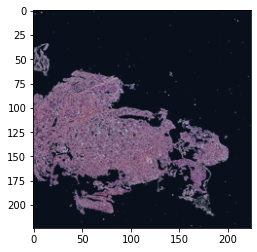

torch.Size([3, 224, 224])


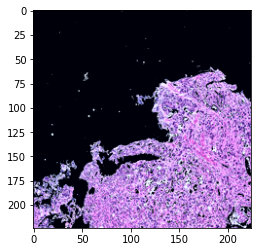

torch.Size([3, 96, 96])


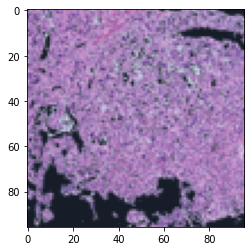

torch.Size([3, 96, 96])


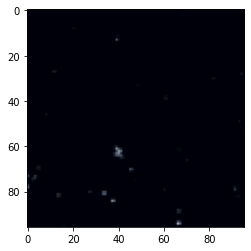

In [10]:
transform = DataAugmentationDINO(global_crops_scale = (0.14, 1.), local_crops_scale = (0.08, 0.1), local_crops_number = 2)
dataset = ImageFolder('../data/train/', transform = transform)

crops,_ = dataset[4]
for crop in crops:
    print(crop.shape)
    plt.imshow(to_numpy(crop))
    plt.show()